# Diabetes prediction model using Decision Tree Classifier 
## 1. Data Download and inspection 

### 1.1 Import Modules 

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from notebook_helper_functions import impute
from notebook_helper_functions import plot_scatter_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFECV
from notebook_helper_functions import plot_cross_validation
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


### 1.2 Data Download 

In [2]:
data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Remove duplicates and reset index 
data_df.drop_duplicates().reset_index(drop=True, inplace=True)
data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1.3 Train-test split 

In [4]:
testing_fraction = 0.33
random_seed=42

In [5]:
training_df, testing_df = train_test_split(
    data_df,
    test_size=testing_fraction,
    random_state=random_seed,
)

In [6]:
training_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
464,10,115,98,0,0,24.0,1.022,34,0
223,7,142,60,33,190,28.8,0.687,61,0
393,4,116,72,12,87,22.1,0.463,37,0
766,1,126,60,0,0,30.1,0.349,47,1
570,3,78,70,0,0,32.5,0.270,39,0
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


In [7]:
testing_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
311,0,106,70,37,148,39.4,0.605,22,0
429,1,95,82,25,180,35.0,0.233,43,1
182,1,0,74,20,23,27.7,0.299,21,0
586,8,143,66,0,0,34.9,0.129,41,1


In [8]:
# Reset the index of the training and testing dataframes
training_df.reset_index(drop=True, inplace=True)
testing_df.reset_index(drop=True, inplace=True)

In [9]:
training_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10,115,98,0,0,24.0,1.022,34,0
1,7,142,60,33,190,28.8,0.687,61,0
2,4,116,72,12,87,22.1,0.463,37,0
3,1,126,60,0,0,30.1,0.349,47,1
4,3,78,70,0,0,32.5,0.270,39,0
...,...,...,...,...,...,...,...,...,...
509,5,139,64,35,140,28.6,0.411,26,0
510,1,96,122,0,0,22.4,0.207,27,0
511,10,101,86,37,0,45.6,1.136,38,1
512,0,141,0,0,0,42.4,0.205,29,1


In [10]:
testing_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
249,0,106,70,37,148,39.4,0.605,22,0
250,1,95,82,25,180,35.0,0.233,43,1
251,1,0,74,20,23,27.7,0.299,21,0
252,8,143,66,0,0,34.9,0.129,41,1


In [11]:
# Set Model features and Labels
training_labels=training_df["Outcome"]
training_labels




0      0
1      0
2      0
3      1
4      0
      ..
509    0
510    0
511    1
512    1
513    0
Name: Outcome, Length: 514, dtype: int64

In [12]:
training_features=training_df.drop('Outcome', axis=1)
training_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,115,98,0,0,24.0,1.022,34
1,7,142,60,33,190,28.8,0.687,61
2,4,116,72,12,87,22.1,0.463,37
3,1,126,60,0,0,30.1,0.349,47
4,3,78,70,0,0,32.5,0.270,39
...,...,...,...,...,...,...,...,...
509,5,139,64,35,140,28.6,0.411,26
510,1,96,122,0,0,22.4,0.207,27
511,10,101,86,37,0,45.6,1.136,38
512,0,141,0,0,0,42.4,0.205,29


### 1.4 Data inspection 

In [13]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               514 non-null    int64  
 1   Glucose                   514 non-null    int64  
 2   BloodPressure             514 non-null    int64  
 3   SkinThickness             514 non-null    int64  
 4   Insulin                   514 non-null    int64  
 5   BMI                       514 non-null    float64
 6   DiabetesPedigreeFunction  514 non-null    float64
 7   Age                       514 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.2 KB


- No missing values 

In [14]:
training_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,3.782101,121.295720,69.984436,20.525292,79.237354,31.969844,0.473089,33.190661
std,3.277187,32.358526,18.008763,15.501504,115.642548,7.649192,0.341989,11.731010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.925000,0.244250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.383500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,125.750000,36.500000,0.614500,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
training_labels.info()

<class 'pandas.core.series.Series'>
RangeIndex: 514 entries, 0 to 513
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
514 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [16]:
list(training_labels.unique())

[np.int64(0), np.int64(1)]

In [17]:
list(training_labels.value_counts())

[332, 182]

## 2. Baseline Model perfromance using Decision Tree Classifier 

In [18]:
cv_method=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=random_seed)
class_weights=None

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scores=cross_val_score(DecisionTreeClassifier(random_state=random_seed, class_weight=class_weights),
    training_features, training_labels,cv=cv_method,n_jobs=-1,scoring='accuracy')

experiments={'Baseline': scores * 100}

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 69.9 +/- 4.4%



Model is 100.0% accurate on the training data
Fitted tree depth: 11

Feature importances:
 Pregnancies: 0.059
 Glucose: 0.362
 BloodPressure: 0.074
 SkinThickness: 0.061
 Insulin: 0.040
 BMI: 0.168
 DiabetesPedigreeFunction: 0.105
 Age: 0.131



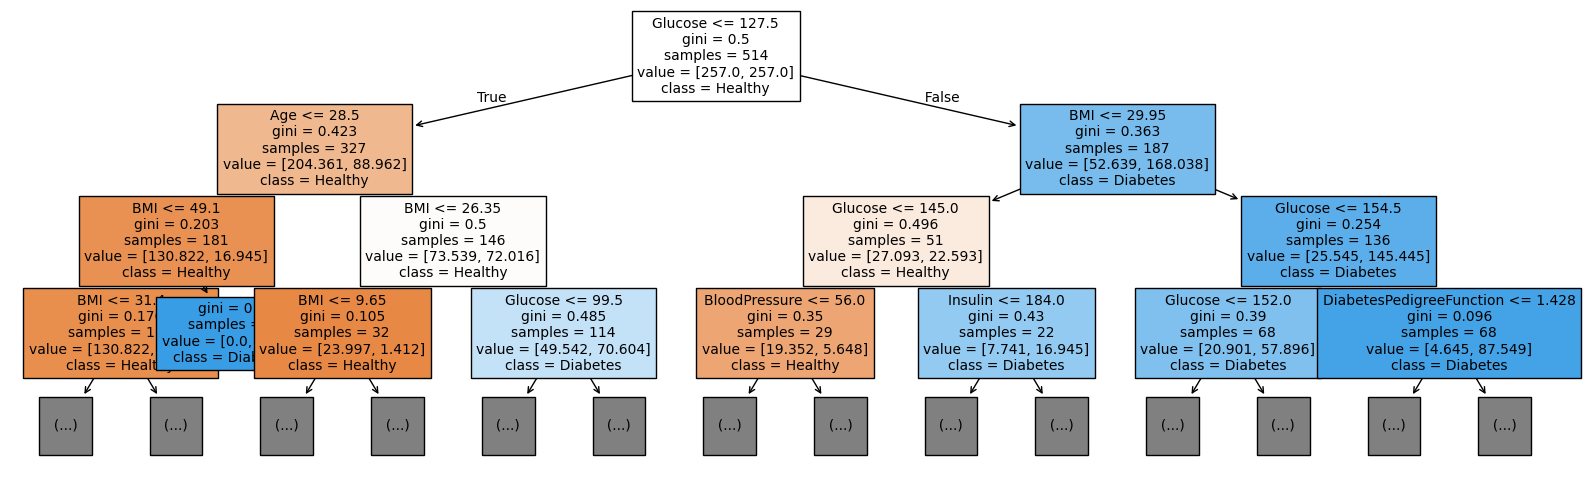

In [20]:

import matplotlib.pyplot as plt
from sklearn import tree

model=DecisionTreeClassifier(random_state=random_seed, class_weight='balanced')
fit_result=model.fit(training_features, training_labels)


predicted_labels=model.predict(training_features)


percent_accuracy=accuracy_score(training_labels, predicted_labels) * 100


print(f'\nModel is {percent_accuracy:.1f}% accurate on the training data')
print(f'Fitted tree depth: {fit_result.tree_.max_depth}')
print('\nFeature importances:')

for feature, importance in zip(training_features.columns, fit_result.tree_.compute_feature_importances()):
    print(f' {feature}: {importance:.3f}')

print()

fig=plt.figure(figsize=(20,6))

tree.plot_tree(model,
    feature_names=list(training_features.columns),
    class_names=['Healthy', 'Diabetes'],
    filled=True,
    fontsize=10,
    max_depth=3
)

plt.show()

## 3. EDA and feature Engineering 
### 3.1 Feature Distributions 

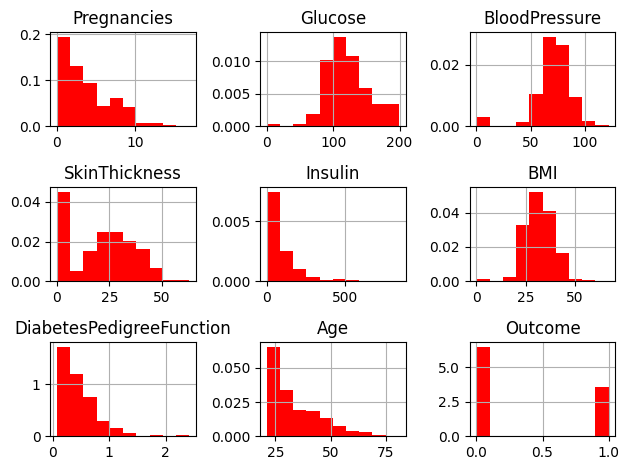

In [21]:
training_df.hist(density=True, layout=(3,3), color ='red')
plt.tight_layout()
plt.show()

In [22]:
training_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,3.782101,121.295720,69.984436,20.525292,79.237354,31.969844,0.473089,33.190661,0.354086
std,3.277187,32.358526,18.008763,15.501504,115.642548,7.649192,0.341989,11.731010,0.478701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.925000,0.244250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.383500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,125.750000,36.500000,0.614500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Many features have zero values, 'blood pressure', 'insulin'. 'glucose', 'BMI' etc 

In [23]:

training_df['BloodPressure'].value_counts()

BloodPressure
70     40
74     37
80     34
68     34
64     31
72     27
78     26
76     26
62     25
66     22
60     20
82     19
0      18
84     17
88     17
90     17
86     15
58     11
54      9
50      8
56      8
52      8
44      4
96      4
92      4
75      3
98      3
85      3
48      3
94      3
110     2
100     2
104     2
65      2
106     2
46      1
30      1
102     1
55      1
24      1
40      1
61      1
122     1
Name: count, dtype: int64

- 18 people with '0' blood pressure ! 

In [24]:
dead_people=len(training_df[training_df['BloodPressure'] == 0])
print(f'Have {dead_people} people with a blood pressure of 0')

Have 18 people with a blood pressure of 0


### 3.2 Missing values 

In [25]:

missing_data_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

filtered_training_df=training_df.copy()
filtered_training_df[missing_data_features]=filtered_training_df[missing_data_features].replace({0:np.nan})
filtered_training_df.dropna(inplace=True)

filtered_training_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,3.335878,124.019084,70.847328,28.904580,155.110687,32.856870,0.511737,30.832061,0.332061
std,3.124764,30.748074,12.670885,10.626832,120.283283,7.188289,0.349665,10.129546,0.471854
min,0.000000,56.000000,24.000000,10.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,100.000000,62.500000,21.000000,79.000000,27.500000,0.273000,23.000000,0.000000
50%,2.000000,120.000000,70.000000,28.500000,125.000000,32.800000,0.443500,27.000000,0.000000
75%,5.000000,143.000000,80.000000,36.000000,182.750000,37.175000,0.653000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Looks like all features with 'zero' values are cleaned up and data appears good to be workded on! 

### 3.3. Imputation 

In [26]:
simple_imputed_training_features=training_features.copy()

for target_feature in missing_data_features:

    impute_data=simple_imputed_training_features[simple_imputed_training_features[target_feature] != 0][target_feature]
    target_feature_imputed_value=impute_data.median()
    imputed_data=simple_imputed_training_features[target_feature].replace({0:target_feature_imputed_value})
    simple_imputed_training_features[target_feature]=imputed_data

    print(f'{target_feature} imputed value: {target_feature_imputed_value:.1f}')

simple_imputed_training_features.describe()

Glucose imputed value: 118.0
BloodPressure imputed value: 72.0
SkinThickness imputed value: 29.0
Insulin imputed value: 125.0
BMI imputed value: 32.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,3.782101,122.214008,72.505837,28.762646,140.278210,32.281128,0.473089,33.190661
std,3.277187,30.522048,12.092761,8.535335,87.135766,6.960701,0.341989,11.731010
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,24.000000,120.000000,27.125000,0.244250,24.000000
50%,3.000000,118.000000,72.000000,29.000000,125.000000,32.000000,0.383500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,125.750000,36.500000,0.614500,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [27]:

scores=cross_val_score(
    DecisionTreeClassifier(random_state=random_seed, class_weight=class_weights),
    simple_imputed_training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

experiments['Simple imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 69.9 +/- 4.5%


- No improvement in model perfromance! 

### 3.4 Scikit-learn Iterative Imputer 

In [28]:


iterative_imputed_training_features, imp, qt=impute(training_features, missing_data_features)

[IterativeImputer] Completing matrix with shape (514, 8)


[IterativeImputer] Completing matrix with shape (514, 8)
New feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_indicator', 'BloodPressure_indicator', 'SkinThickness_indicator', 'Insulin_indicator', 'BMI_indicator']


In [29]:

scores=cross_val_score(
    DecisionTreeClassifier(random_state=random_seed, class_weight=class_weights),
    iterative_imputed_training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)


experiments['Iterative imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 70.9 +/- 4.4%


- Very minor improvement! 

### 3.5 Manual feature selection 
#### 3.5.1 Feature cross-correlation 

Have 8 features for plot:
 0: Pregnancies
 1: Glucose
 2: BloodPressure
 3: SkinThickness
 4: Insulin
 5: BMI
 6: DiabetesPedigreeFunction
 7: Age


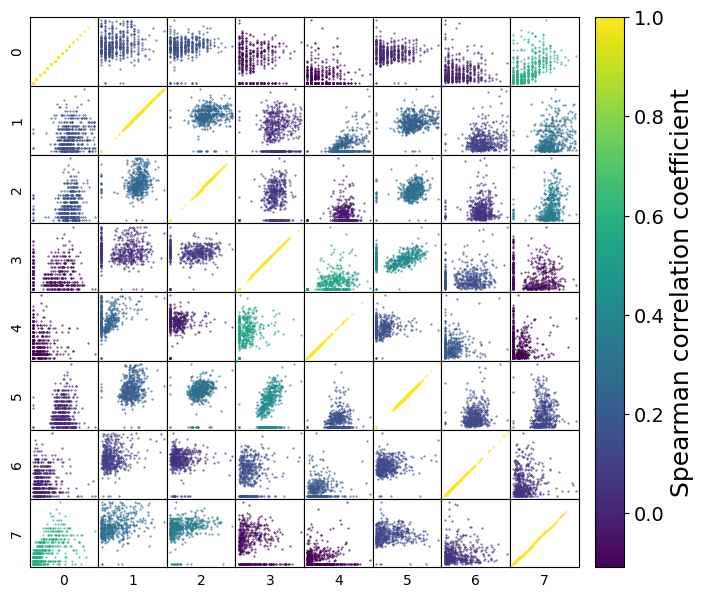

In [30]:
plot_scatter_matrix(training_features).show()

#### 3.5.2 Feature mutual information 

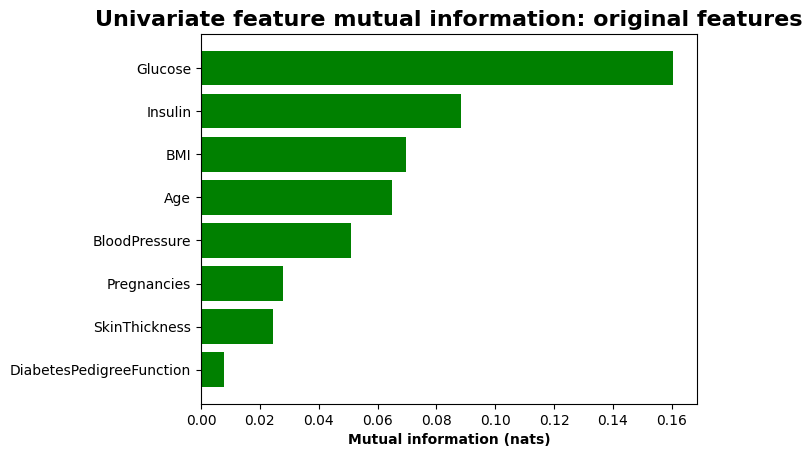

In [31]:
from sklearn.feature_selection import mutual_info_classif

results=mutual_info_classif(training_features, training_labels)

univariate_mi_results={}

for feature, result in zip(training_features.columns, results):
    univariate_mi_results[feature]=result

univariate_mi_results=dict(sorted(univariate_mi_results.items(), key=lambda item: item[1]))

plt.title('Univariate feature mutual information: original features', fontsize=16, fontweight='bold')

plt.barh(
    np.arange(len(univariate_mi_results.values())),
    univariate_mi_results.values(),
    tick_label=list(univariate_mi_results.keys()), color='green'
)

plt.xlabel('Mutual information (nats)', fontweight='bold')

plt.show()

In [32]:
manually_selected_feature_names=['Glucose','Insulin','BMI','Age']
manually_selected_training_features=training_features[manually_selected_feature_names]

In [33]:
scores=cross_val_score(
    DecisionTreeClassifier(random_state=random_seed, class_weight=class_weights),
    manually_selected_training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)


experiments['Manual feature selection']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 70.9 +/- 3.6%


### 3.6 Automated feature selection 

In [34]:
min_features_to_select=1
clf=DecisionTreeClassifier(random_state=random_seed)

rfecv=RFECV(
    estimator=model,
    step=1,
    cv=cv_method,
    scoring='accuracy',
    min_features_to_select=min_features_to_select,
    n_jobs=-1
)

rfecv.fit(training_features, training_labels)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 8


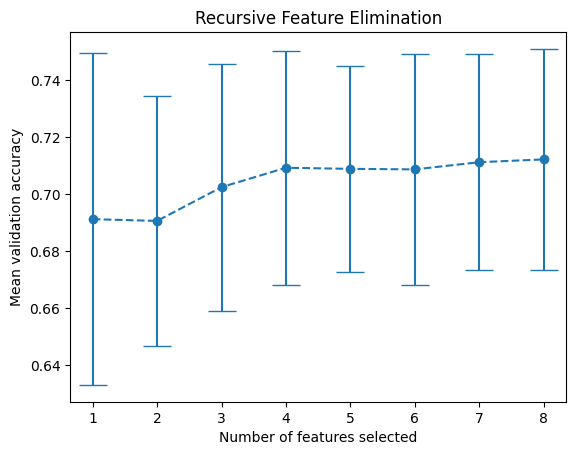

In [35]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Mean validation accuracy')
plt.errorbar(
    x=cv_results['n_features'],
    y=cv_results['mean_test_score'],
    yerr=cv_results['std_test_score'],
    capsize=10,
    marker='o',
    linestyle='dashed'
)
plt.title('Recursive Feature Elimination')
plt.show()

- No significant different in feature sets! More or less same spread! 

In [36]:
automatically_selected_training_features=training_features.to_numpy()
automatically_selected_training_features=automatically_selected_training_features[:,rfecv.get_support()]

automatically_selected_feature_names=[b for a, b in zip(rfecv.get_support(), training_features.columns) if a]
automatically_selected_training_features=pd.DataFrame(data=automatically_selected_training_features, columns=automatically_selected_feature_names)
automatically_selected_training_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10.0,115.0,98.0,0.0,0.0,24.0,1.022,34.0
1,7.0,142.0,60.0,33.0,190.0,28.8,0.687,61.0
2,4.0,116.0,72.0,12.0,87.0,22.1,0.463,37.0
3,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0
4,3.0,78.0,70.0,0.0,0.0,32.5,0.270,39.0


In [37]:
automatically_selected_training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               514 non-null    float64
 1   Glucose                   514 non-null    float64
 2   BloodPressure             514 non-null    float64
 3   SkinThickness             514 non-null    float64
 4   Insulin                   514 non-null    float64
 5   BMI                       514 non-null    float64
 6   DiabetesPedigreeFunction  514 non-null    float64
 7   Age                       514 non-null    float64
dtypes: float64(8)
memory usage: 32.2 KB


In [38]:
scores=cross_val_score(
    DecisionTreeClassifier(random_state=random_seed, class_weight=class_weights),
    automatically_selected_training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)


experiments['Automatic feature selection']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 69.9 +/- 4.4%


### 3.7 Model performance comparison 

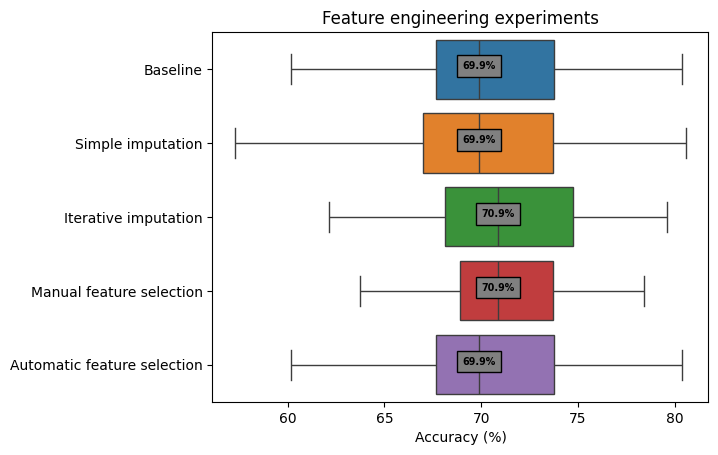

In [39]:
plot_cross_validation('Feature engineering experiments', experiments).show()

### 3.8 Other combinations 
#### 3.8.1 Impute first then feature selection

In [40]:
from sklearn.feature_selection import RFECV

min_features_to_select=1
clf=DecisionTreeClassifier(random_state=random_seed)

rfecv=RFECV(
    estimator=model,
    step=1,
    cv=cv_method,
    scoring='accuracy',
    min_features_to_select=min_features_to_select,
    n_jobs=-1
)

rfecv.fit(iterative_imputed_training_features, training_labels)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 5


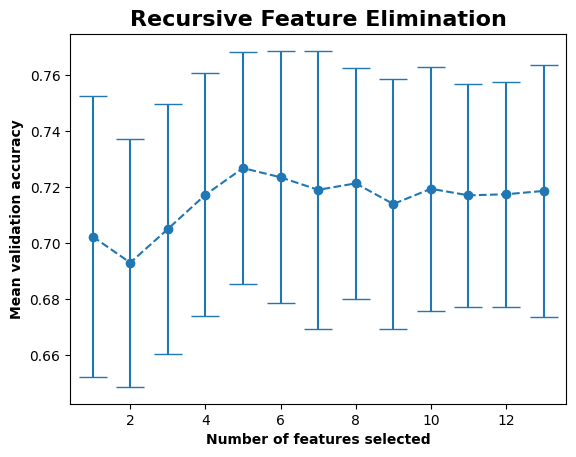

In [41]:

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel('Number of features selected', fontweight='bold')
plt.ylabel('Mean validation accuracy', fontweight='bold')
plt.errorbar(
    x=cv_results['n_features'],
    y=cv_results['mean_test_score'],
    yerr=cv_results['std_test_score'],
    capsize=10,
    marker='o',
    linestyle='dashed'
)
plt.title('Recursive Feature Elimination', fontsize=16, fontweight='bold')
plt.show()

In [42]:
automatically_selected_imputed_training_features=iterative_imputed_training_features.to_numpy()
automatically_selected_imputed_training_features=automatically_selected_imputed_training_features[:,rfecv.get_support()]

automatically_selected_imputed_feature_names=[b for a, b in zip(rfecv.get_support(), iterative_imputed_training_features.columns) if a]
automatically_selected_imputed_training_features=pd.DataFrame(data=automatically_selected_imputed_training_features, columns=automatically_selected_imputed_feature_names)
automatically_selected_imputed_training_features.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,115.0,82.709567,24.0,1.022,34.0
1,142.0,190.000000,28.8,0.687,61.0
2,116.0,87.000000,22.1,0.463,37.0
3,126.0,94.864348,30.1,0.349,47.0
4,78.0,118.527914,32.5,0.270,39.0


In [43]:
scores=cross_val_score(
    DecisionTreeClassifier(random_state=random_seed, class_weight=class_weights),
    automatically_selected_imputed_training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)


experiments['Iterative imputation,\nfeature selection']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 72.2 +/- 4.3%


#### 3.8.2 Select features and the nimpute 

In [44]:
automatically_selected_missing_data_features=[]

for feature in missing_data_features:
    if feature in automatically_selected_training_features.columns:
        automatically_selected_missing_data_features.append(feature)

imputed_automatically_selected_training_features, automatically_selected_features_imp, automatically_selected_features_qt=impute(automatically_selected_training_features, automatically_selected_missing_data_features)

[IterativeImputer] Completing matrix with shape (514, 8)
[IterativeImputer] Completing matrix with shape (514, 8)
New feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_indicator', 'BloodPressure_indicator', 'SkinThickness_indicator', 'Insulin_indicator', 'BMI_indicator']


In [45]:
scores=cross_val_score(
    DecisionTreeClassifier(random_state=random_seed, class_weight=class_weights),
    imputed_automatically_selected_training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)


experiments['Feature selection,\niterative imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 69.9 +/- 3.5%


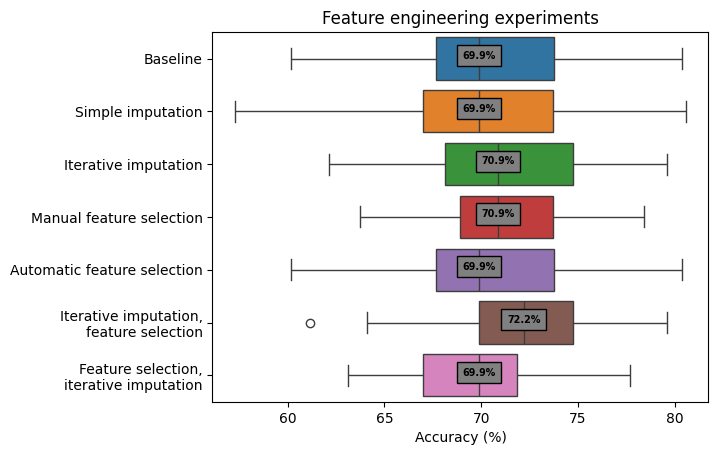

In [46]:
plot_cross_validation('Feature engineering experiments', experiments).show()

In [47]:
hyperparameter_tuning_features=iterative_imputed_training_features[manually_selected_feature_names]
hyperparameter_tuning_features.head()

,Glucose,Insulin,BMI,Age
0,115.0,82.709567,24.0,34.0
1,142.0,190.000000,28.8,61.0
2,116.0,87.000000,22.1,37.0
3,126.0,94.864348,30.1,47.0
4,78.0,118.527914,32.5,39.0


## 4. Hyperparameter Optimization 

In [48]:
hyperparameter_experiments={
    'Baseline': experiments['Baseline'],
    'Iterative imputation,\nfeature selection': experiments['Iterative imputation,\nfeature selection']
}

### 4.1 Criterion, splitter and class_weight 

In [49]:
model=DecisionTreeClassifier(random_state=random_seed)

distributions={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']
}

grid=GridSearchCV(
    model,
    distributions,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv_method,
    return_train_score=True
)

results=grid.fit(hyperparameter_tuning_features, training_labels)
print(f'Best hyperparameters: {results.best_params_}')

Best hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'splitter': 'best'}


Scikit-learn defualts are: 
1. criterion='gini'
2. splitter='best'
3. class_weight=None

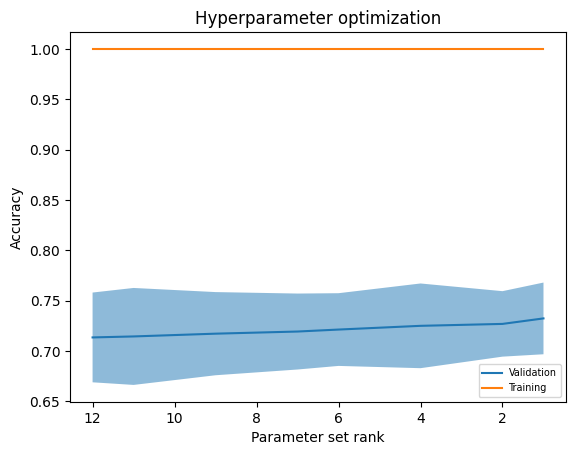

In [50]:
from notebook_helper_functions import plot_hyperparameter_tuning
plot_hyperparameter_tuning(results).show()

In [51]:
model=DecisionTreeClassifier(
    class_weight=results.best_params_['class_weight'],
    criterion=results.best_params_['criterion'],
    splitter=results.best_params_['splitter'],
    random_state=random_seed
)


scores=cross_val_score(
    model,
    hyperparameter_tuning_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

hyperparameter_experiments['Hyperparameter\noptimization\nround 1']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 72.8 +/- 3.6%


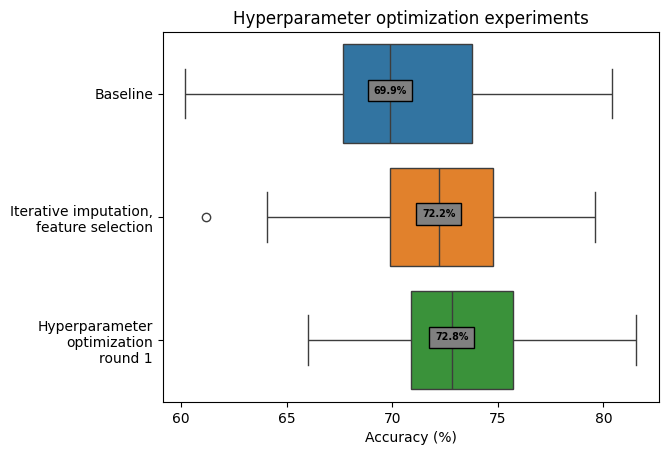

In [52]:
plot_cross_validation('Hyperparameter optimization experiments', hyperparameter_experiments).show()

### 4.2 Other hyperparamters 

In [53]:
model=DecisionTreeClassifier(random_state=random_seed)

distributions={
    'max_depth': list(range(1, 50)),
    'min_samples_split': list(range(5, 50)),
    'min_samples_leaf': list(range(5, 50)),
    'min_weight_fraction_leaf': uniform(loc=0, scale=0.5),
    'max_features': uniform(loc=0, scale=1),
    'min_impurity_decrease': uniform(loc=0, scale=1)
}

grid=RandomizedSearchCV(
    model,
    distributions,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv_method,
    n_iter=500,
    random_state=random_seed,
    return_train_score=True
)

results=grid.fit(hyperparameter_tuning_features, training_labels)
print(f'Best hyperparameters: {results.best_params_}')

Best hyperparameters: {'max_depth': 19, 'max_features': np.float64(0.5950779307002548), 'min_impurity_decrease': np.float64(0.05142581348425035), 'min_samples_leaf': 49, 'min_samples_split': 47, 'min_weight_fraction_leaf': np.float64(0.1671219454084804)}


/usr/local/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


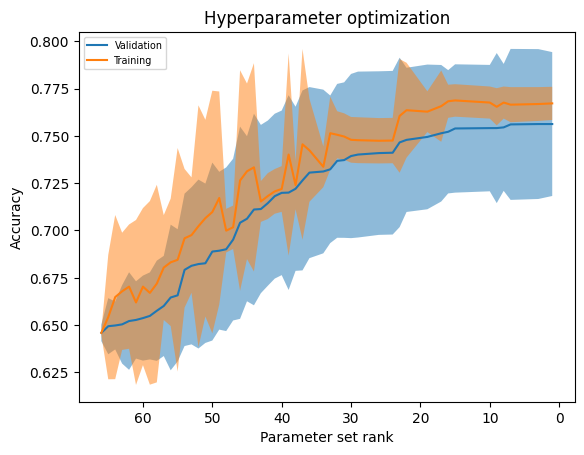

In [54]:
plot_hyperparameter_tuning(results).show()


In [55]:
model=DecisionTreeClassifier(
    max_depth=results.best_params_['max_depth'],
    max_features=results.best_params_['max_features'],
    min_impurity_decrease=results.best_params_['min_impurity_decrease'],
    min_samples_leaf=results.best_params_['min_samples_leaf'],
    min_samples_split=results.best_params_['min_samples_split'],
    min_weight_fraction_leaf=results.best_params_['min_weight_fraction_leaf'],
)

# Run cross-validation on the best model
scores=cross_val_score(
    model,
    hyperparameter_tuning_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
hyperparameter_experiments['Hyperparameter\noptimization\nround 2']=scores * 100

print(f'Cross-validation accuracy: {(np.median(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 71.8 +/- 6.9%


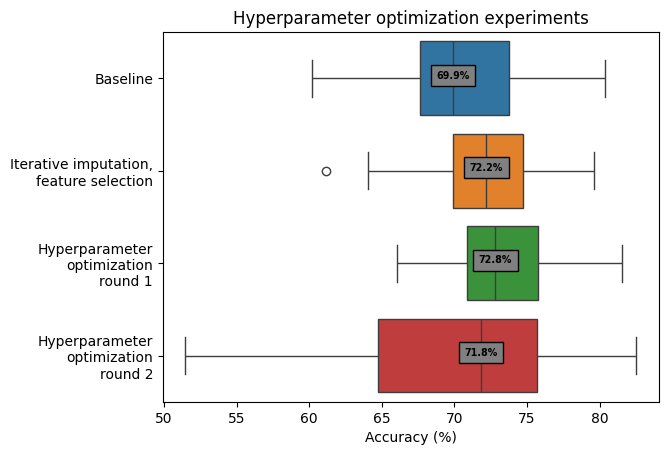

In [56]:
plot_cross_validation('Hyperparameter optimization experiments', hyperparameter_experiments).show()

In [57]:
fit_result=model.fit(hyperparameter_tuning_features, training_labels)

## 5. Evaluation 

### 5.1 Evaluate model performnace on test data set 

In [58]:
testing_labels=testing_df['Outcome']
testing_features=testing_df.drop('Outcome', axis=1)

In [59]:
feature_names=list(testing_features.columns)


imputed_testing_features=testing_features.copy()
imputed_testing_features[missing_data_features]=imputed_testing_features[missing_data_features].replace({0:np.nan})


imputed_testing_features[missing_data_features]=qt.transform(imputed_testing_features[missing_data_features])

imputed_testing_features=imp.transform(imputed_testing_features)

indicator_features=[]
for feature in missing_data_features:
    indicator_features.append(f'{feature}_indicator')

feature_names.extend(indicator_features)
imputed_testing_features=pd.DataFrame(data=imputed_testing_features, columns=feature_names)


imputed_testing_features[missing_data_features]=qt.inverse_transform(imputed_testing_features[missing_data_features])
imputed_testing_features.head()

[IterativeImputer] Completing matrix with shape (254, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_indicator,BloodPressure_indicator,SkinThickness_indicator,Insulin_indicator,BMI_indicator
0,6.0,98.0,58.0,33.000000,190.000000,34.0,0.430,43.0,0.0,0.0,0.0,0.0,0.0
1,2.0,112.0,75.0,32.000000,120.229376,35.7,0.148,21.0,0.0,0.0,0.0,1.0,0.0
2,2.0,108.0,64.0,19.407674,29.296845,30.8,0.158,21.0,0.0,0.0,1.0,1.0,0.0
3,8.0,107.0,80.0,37.000000,53.965964,24.6,0.856,34.0,0.0,0.0,1.0,1.0,0.0
4,7.0,136.0,90.0,15.864846,73.398259,29.9,0.210,50.0,0.0,0.0,1.0,1.0,0.0


In [60]:
selected_imputed_testing_features=imputed_testing_features[manually_selected_feature_names]
selected_imputed_testing_features.head()

,Glucose,Insulin,BMI,Age
0,98.0,190.000000,34.0,43.0
1,112.0,120.229376,35.7,21.0
2,108.0,29.296845,30.8,21.0
3,107.0,53.965964,24.6,34.0
4,136.0,73.398259,29.9,50.0


In [61]:
predicted_labels=model.predict(selected_imputed_testing_features)

percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 72.0% accurate on the test data


- a slight improvment from baseline model performance! 

### 5.2 Save assets for later deployment 

In [62]:
model_output_file='../models/model.pkl'

with open(model_output_file, 'wb') as output_file:
    pickle.dump(model, output_file, protocol=pickle.HIGHEST_PROTOCOL)

quantile_transformer_output_file='../models/quantile_transformer.pkl'

with open(quantile_transformer_output_file, 'wb') as output_file:
    pickle.dump(qt, output_file, protocol=pickle.HIGHEST_PROTOCOL)


imputer_output_file='../models/imputer.pkl'

with open(imputer_output_file, 'wb') as output_file:
    pickle.dump(imp, output_file, protocol=pickle.HIGHEST_PROTOCOL)

### 5.3 Test manual data 
#### 5.3.1 Features 

In [63]:
manual_test_points=selected_imputed_testing_features.sample(5)
manual_test_points.head()

,Glucose,Insulin,BMI,Age
91,92.0,94.835251,42.200000,29.0
164,87.0,75.000000,37.200000,22.0
180,145.0,110.000000,22.200000,57.0
196,102.0,56.782697,26.894403,21.0
216,165.0,680.000000,52.300000,23.0


#### 5.3.2 Labels 

In [64]:
predictions=model.predict(manual_test_points)
print(predictions)

[0 0 1 0 1]
